In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
def decode_eventid(eventid):
    """
    assume encoding from fuel_up_nukecc.py, etc.
    """
    eventid = str(eventid)
    phys_evt = eventid[-2:]
    eventid = eventid[:-2]
    gate = eventid[-4:]
    eventid = eventid[:-4]
    subrun = eventid[-4:]
    eventid = eventid[:-4]
    run = eventid
    return (run, subrun, gate, phys_evt)

In [3]:
f = h5py.File('../hdf5/vtxfndingimgs_127x94_me1Amc.hdf5', 'r')

In [4]:
len(f['event_data']['eventids'][:])

1387641

In [5]:
print f['event_data'].keys()

[u'eventids', u'eventids_a', u'eventids_b', u'planecodes', u'segments', u'zs']


In [6]:
print f['img_data'].keys()

[u'hitimes-u', u'hitimes-v', u'hitimes-x']


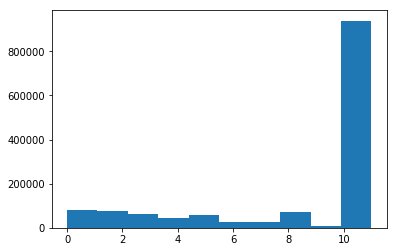

In [7]:
n, bins, patches = plt.hist(f['event_data']['segments'][:], bins=10, range=(0, 11))

In [8]:
n / n[-1]

array([ 0.08730967,  0.0796699 ,  0.06541326,  0.04717371,  0.06124176,
        0.02646003,  0.02770349,  0.07668752,  0.00689817,  1.        ])

In [9]:
runnums = [int(decode_eventid(eid[0])[0]) for eid in f['event_data']['eventids'][:500]]
subnums = [int(decode_eventid(eid[0])[1]) for eid in f['event_data']['eventids'][:500]]
gatnums = [int(decode_eventid(eid[0])[2]) for eid in f['event_data']['eventids'][:500]]
phynums = [int(decode_eventid(eid[0])[3]) for eid in f['event_data']['eventids'][:500]]

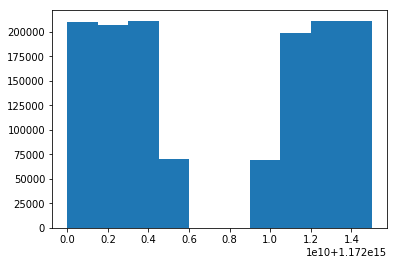

In [10]:
n, bins, patches = plt.hist(f['event_data']['eventids'][:])

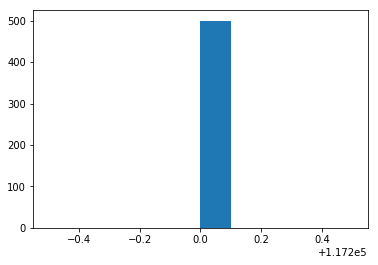

In [11]:
n, bins, patches = plt.hist(runnums)

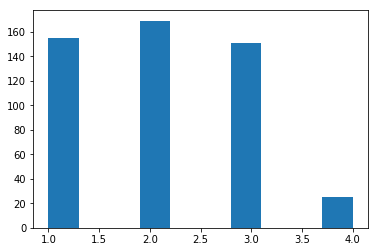

In [12]:
n, bins, patches = plt.hist(subnums)

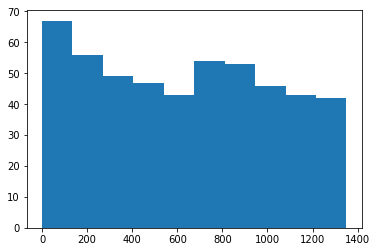

In [13]:
n, bins, patches = plt.hist(gatnums)

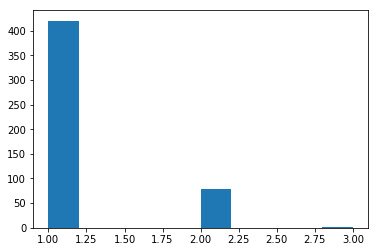

In [14]:
n, bins, patches = plt.hist(phynums)

In [15]:
print max(runnums)
print np.max(f['event_data']['eventids'][:])
print np.min(f['event_data']['eventids'][:])

117200
1172015000129401
1172000001000102


In [16]:
any(np.array(runnums) == 112205)

False

In [17]:
for group in f:
    for dset in f[group]:
        print '{:>10}/{:<10} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids   -   uint64 (1387641, 1)
event_data/eventids_a -   uint32 (1387641, 1)
event_data/eventids_b -   uint32 (1387641, 1)
event_data/planecodes -   uint16 (1387641, 1)
event_data/segments   -    uint8 (1387641, 1)
event_data/zs         -  float32 (1387641, 1)
  img_data/hitimes-u  -  float32 (1387641, 2, 127, 47)
  img_data/hitimes-v  -  float32 (1387641, 2, 127, 47)
  img_data/hitimes-x  -  float32 (1387641, 2, 127, 94)


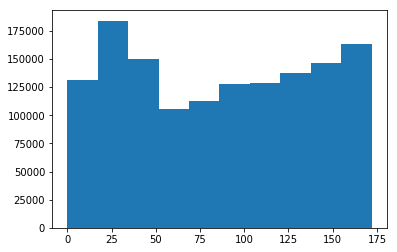

In [18]:
n, bins, patches = plt.hist(f['event_data']['planecodes'][:])

In [19]:
np.min(f['event_data']['planecodes']), np.max(f['event_data']['planecodes'])

(0, 172)

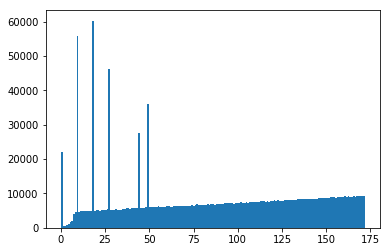

In [20]:
_, _, _ = plt.hist(f['event_data']['planecodes'][:], bins=173, range=(0, 172))

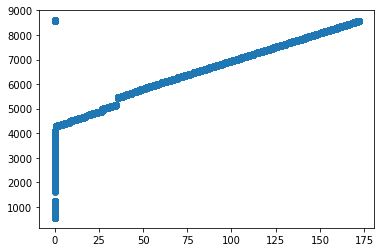

In [21]:
plt.scatter(f['event_data']['planecodes'][:], f['event_data']['zs'][:])

In [22]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [23]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

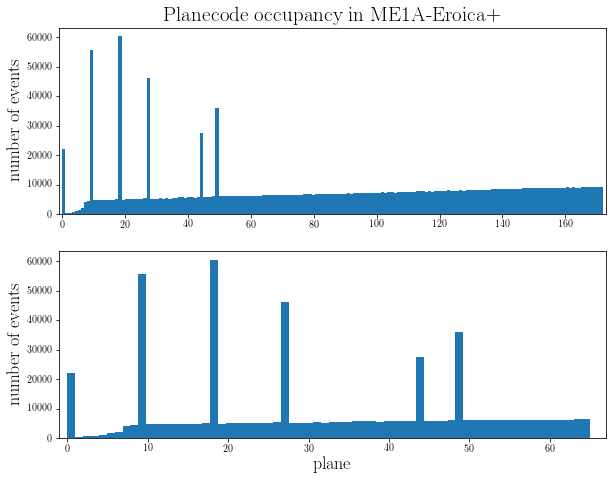

In [24]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(f['event_data']['planecodes'][:], bins=173, range=(0, 172))
plt.xlim(-1, 173)
plt.title('Planecode occupancy in ME1A-Eroica+', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(f['event_data']['planecodes'][:], bins=66, range=(0, 65))
plt.xlim(-1, 67)
plt.xlabel('plane', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('planecode_occupancy_me1Amc_eroicaplus.pdf', bbox_inches='tight')

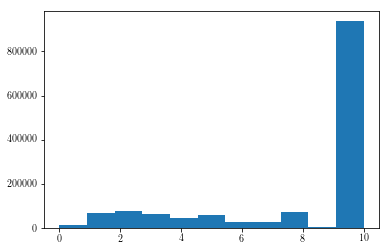

In [25]:
nums, bins, _ = plt.hist(f['event_data']['segments'][:], bins=11, range=(0, 10))

In [26]:
new_nums = np.zeros_like(nums)
new_nums[0] = nums[0]
new_nums[1] = nums[1]
new_nums[2] = nums[6]
new_nums[3] = nums[2]
new_nums[4] = nums[7]
new_nums[5] = nums[3]
new_nums[6] = nums[8]
new_nums[7] = nums[4]
new_nums[8] = nums[9]
new_nums[9] = nums[5]
new_nums[10] = nums[10]

In [27]:
print(nums)
print(new_nums)

[  12588.   69353.   74771.   61391.   44273.   57476.   24833.   26000.
   71972.    6474.  938510.]
[  12588.   69353.   24833.   74771.   26000.   61391.   71972.   44273.
    6474.   57476.  938510.]


In [28]:
new_data = []
[new_data.extend([i] * int(new_nums[i])) for i in range(11)]
#new_data.extend([0] * 5)
#new_data

[None, None, None, None, None, None, None, None, None, None, None]

In [29]:
len(new_data)

1387641

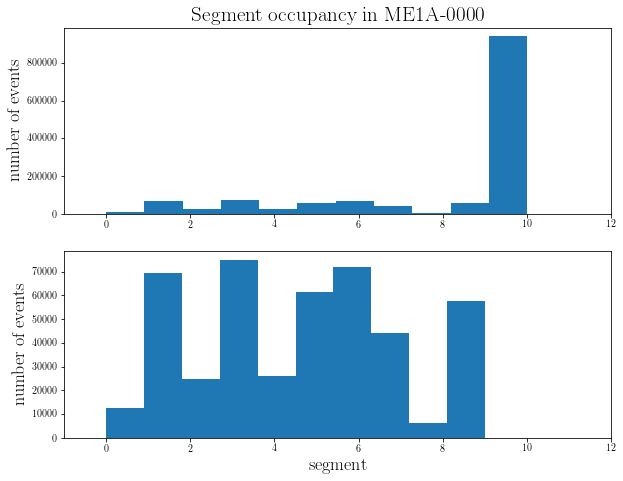

In [30]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

ax1 = plt.subplot(2, 1, 1)
_, _, _ = plt.hist(new_data, bins=11, range=(0, 10))
plt.xlim(-1, 12)
plt.title('Segment occupancy in ME1A-0000', fontsize=21)
plt.ylabel('number of events', fontsize=18)

ax2 = plt.subplot(2, 1, 2)
_, _, _ = plt.hist(new_data, bins=10, range=(0, 9))
plt.xlim(-1, 12)
plt.xlabel('segment', fontsize=18)
plt.ylabel('number of events', fontsize=18)

fig.savefig('segment_occupancy_me1Amc_0000.pdf', bbox_inches='tight')

In [31]:
import plane_codes

In [32]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


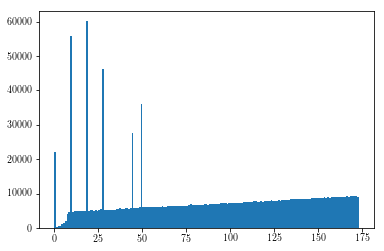

In [33]:
n, bins, patches = plt.hist(f['event_data']['planecodes'][:], bins=np.arange(174))  # need 174 to see all?

In [34]:
planes = np.zeros(np.shape(f['event_data']['planecodes']))
f['event_data']['planecodes'].read_direct(planes)

(array([ 22011.,    419.,    555.,    705.,   1036.,   1565.,   2026.,
          4083.,   4517.,  55781.,   4716.,   4814.,   4886.,   4861.,
          4853.,   4826.,   4899.,   4973.,  60255.,   4890.,   5189.,
          5092.,   5005.,   5135.,   5040.,   5155.,   5391.,  46219.,
          5205.,   5170.,   5089.,   5347.,   5249.,   5310.,   5297.,
          5393.,   5615.,   5713.,   5647.,   5535.,   5747.,   5828.,
          5630.,   5756.,  27608.,   5681.,   5811.,   5831.,   6012.,
         36110.,   6061.,   6064.,   6004.,   6152.,   5994.,   6208.,
          6170.,   6092.,   6118.,   6171.,   6235.,   6261.,   6197.,
          6196.,   6355.,   6351.,   6414.,   6340.,   6416.,   6486.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 

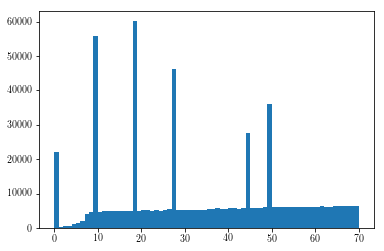

In [35]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

65
66


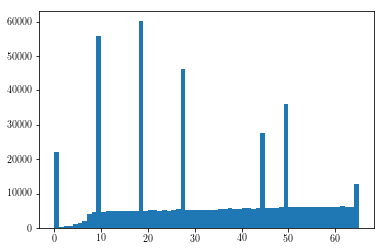

In [36]:
n, bins, _ = plt.hist(planes[planes < 66], bins=np.arange(66))
print len(n)
print len(bins)

In [37]:
print any(planes == 67)

True


In [38]:
print any(planes > 66)

True


In [39]:
print any(planes < 0)

False


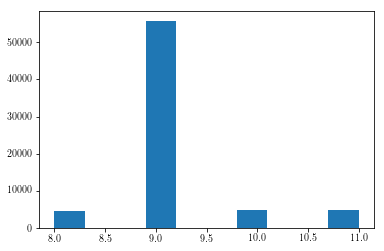

In [40]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

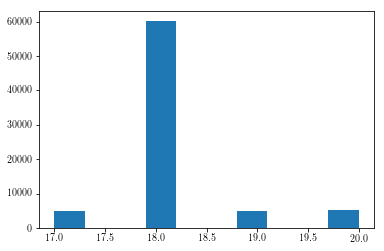

In [41]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

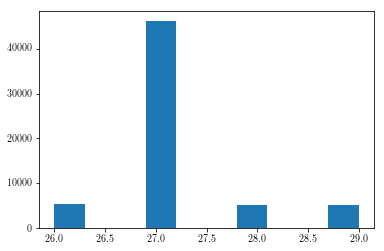

In [42]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

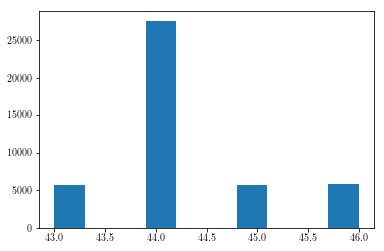

In [43]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

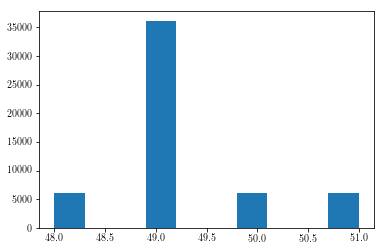

In [44]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [45]:
segments = np.zeros(np.shape(f['event_data']['segments']))
f['event_data']['segments'].read_direct(segments)

(array([  12588.,   69353.,   74771.,   61391.,   44273.,   57476.,
          24833.,   26000.,   71972.,    6474.,  938510.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

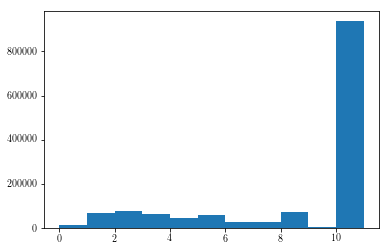

In [46]:
plt.hist(segments, bins=np.arange(12))

In [47]:
print np.min(planes)
print np.max(planes)

0.0
172.0
